In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

## Load data that we will used

In [ ]:
df = pd.read_csv("/content/bodyPerformance.csv")

In [ ]:
print(df.shape)
df.head(10)

(13393, 12)


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
5,36.0,F,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B
6,42.0,F,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0,D
7,33.0,M,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0,B
8,54.0,M,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0,C
9,28.0,M,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0,B


In [ ]:
df['class'].value_counts() #data not balanced and filtered yet

C    3349
D    3349
A    3348
B    3347
Name: class, dtype: int64

In [ ]:
# Filter the dataset to include only classes A and D
df = df[df['class'].isin(['A', 'D'])] #we use it as A and B later

In [ ]:
df['class'] = df['class'].replace({'D': 'B'})

## Balancing dataset class that we used

In [ ]:
class_counts = df['class'].value_counts()

# Process the data to ensure a total of 300 data points with a balanced distribution
target_count = 300

df = pd.concat([df[df['class'] == class_label].sample(n=target_count, random_state=42) for class_label in class_counts.index])

# Display the balanced distribution
print("\nBalanced Distribution:")
print(df['class'].value_counts())


Balanced Distribution:
D    300
A    300
Name: class, dtype: int64


## Encode the gender and class column

In [ ]:
LE = LabelEncoder()

# Encode labels in column 'species'.
df['gender']= LE.fit_transform(df['gender'])
df['encoded_class'] = LE.fit_transform(df['class'])

df['gender'].unique()

array([0, 1])

In [ ]:
print(df.shape)
df

(600, 13)


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,encoded_class
7306,29.0,0,160.7,48.4,22.80000,62.0,120.0,25.4,0.4,29.0,149.0,B,1
10507,57.0,0,151.9,60.6,37.60000,87.0,151.0,24.9,9.2,28.0,134.0,B,1
6138,42.0,0,160.0,67.6,30.70000,97.0,142.0,20.4,-2.0,35.0,139.0,B,1
4938,49.0,1,177.6,66.0,22.50000,81.0,120.0,33.1,12.8,30.0,185.0,B,1
11881,55.0,0,156.4,51.6,26.79869,90.0,132.0,22.9,16.8,20.0,143.0,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10810,37.0,1,165.0,86.9,28.90000,70.0,114.0,42.7,17.3,51.0,242.0,A,0
6322,63.0,1,168.8,63.2,13.90000,92.0,156.0,38.3,13.2,34.0,193.0,A,0
11971,23.0,0,164.4,64.3,27.70000,72.0,130.0,29.0,23.4,43.0,199.0,A,0
1066,46.0,1,173.3,69.3,21.90000,88.0,140.0,44.3,15.5,45.0,208.0,A,0


## Splitting the data into train 90% and test 10%

In [ ]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['class', 'encoded_class'])  # Exclude the 'class' and 'encoded_class' columns
y = df['encoded_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X_train = sm.add_constant(X_train)
model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.140696
         Iterations 9


## Interpretasi :
Aku gatau jd jangan aku yang nulis tp pokoknya klo mau interpretasi bisa nulis disini

In [ ]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:          encoded_class   No. Observations:                  540
Model:                          Logit   Df Residuals:                      528
Method:                           MLE   Df Model:                           11
Date:                Thu, 18 Jan 2024   Pseudo R-squ.:                  0.7970
Time:                        04:56:48   Log-Likelihood:                -75.976
converged:                       True   LL-Null:                       -374.21
Covariance Type:            nonrobust   LLR p-value:                7.999e-121
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      18.5894     10.129      1.835      0.066      -1.262      38.441
age                        -0.1602      0.030     -5.411      0.000      -0.218      -0.102


## Predicting test dataset by using the model that we just created

In [ ]:
# performing predictions on the test dataset
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)
prediction = list(map(round, y_pred))

# comparing original and predicted values of y
print('Actual values', list(y_test.values))
print('Predictions :', prediction)

Actual values [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]
Predictions : [1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]


## Very High Accuracy OMAGAAAA

In [ ]:
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

Test accuracy =  0.95


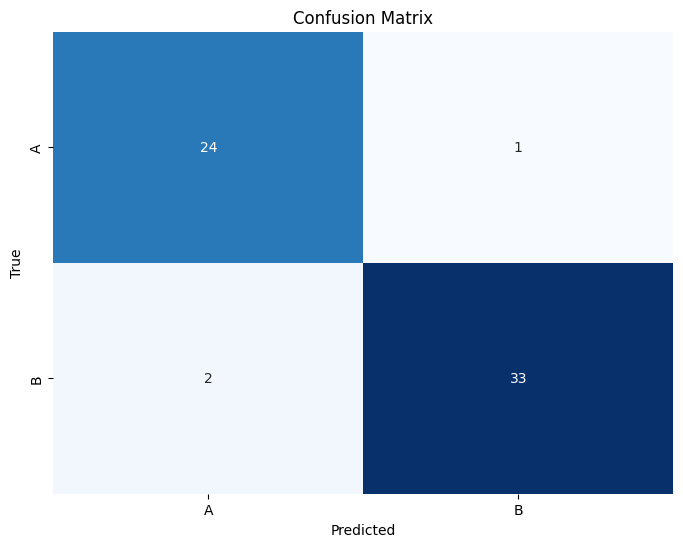

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, prediction)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['A', 'B'], yticklabels=['A', 'B'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()